#```Proyek Analisis Data : Spotify Genre Data```



## **Team**
- [Muhammad Dhafa Maulana](https://github.com/Dhafx) - 202110370311100
- [Ivan Ally Ramadhan](https://github.com/ivanallyy) - 202110370311105

## ```- Import Semua Packages/Library yang Digunakan```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ```- Data Wrangling```

### ```Gathering Data```

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2020/2020-01-21/spotify_songs.csv")
df.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   7    -3.778   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  
3  121.956       169093  
4  123.976       189052  

[5 rows x 23 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [4]:
df.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

```
- Description of dataset

* Track_id : Song unique ID
* Track_name : Nama Lagu
* Track_artist : Song Artist
* Track_popularity : Popularitas Lagu, dengan range 0 hingga 100, lebih tinggi mengindikasikan pengaruh yang lebih baik
* Track_album_id : Album unique ID
* Track_album_name : Nama Album Lagu
* Track_album_release_date : Tanggal pada waktu album dirilis
* Playlist_name : Nama Playlist
* Playlist_id : Playlist ID
* Playlist_genre : Playlist genre
* Playlist_subgenre : Playlist subgenre
* Danceability : Untuk mendeskripsikan seberapa cocok track yang digunakan untuk dancing. Value 0.0 menandakan least danceable dan 1.0 mengindikasikan most danceable. Parameter ini menandakan sejauh mana pendengar dapat mendalami lagu hingga membuatnya menari/dancing.
* Energy : Fitur ini merupakan ukuran dengan skala 0.0 hingga 1.0 dan merepresentasikan sebuah ukuran perseptual dari intensitas dan aktivitas ketika mendengarkan lagu. Secara spesifiknya, track yang cukup energetic terkesan cepat, nyaring, dan berisik(noisy).
* Key : Total jumlah keseluruhan dari key track. Map integer digunakan untuk melakukan pitch menggunakan notasi standar pitch class. Sebagai contoh, 0 = C, 1 = C♯/D♭, 2 = D, begitu pula selanjutnya. Jika tidak ada key yang terdeteksi, value yang diberikan adalah -1.
* Loudness : Ukuran loudness/seberapa besar volume suara yang digunakan dalam lagu dalam satuan decibels(dB).
* Mode : Mode menunjukkan modalitas (mayor atau minor) dari sebuah lagu, jenis tangga nada yang menjadi sumber konten melodinya. Mayor diwakili oleh 1 dan minor adalah 0.
* Speechiness : Speechiness mendeteksi keberadaan kata-kata yang diucapkan dalam sebuah trek, semakin eksklusif rekaman tersebut seperti pidato (misalnya, talkshow, buku audio, puisi), semakin mendekati 1,0 nilai atributnya.
* Acousticness : Ukuran keyakinan dari 0,0 hingga 1,0 tentang apakah trek tersebut akustik.
* Instrumentalness : Memprediksi apakah trek tidak mengandung vokal. Semakin dekat nilai instrumentalitas ke 1,0, semakin besar kemungkinan trek tidak mengandung konten vokal.
* Liveness : Menjadi indikasi adanya relasi antara lagu dengan makna hidup dalam track lagu.
* Valence : Ukuran dari 0,0 hingga 1,0 yang menggambarkan kepositifan musik yang disampaikan oleh sebuah lagu.
* Tempo : Perkiraan tempo keseluruhan trek dalam ketukan per menit (BPM).
* Duration_ms : Durasi lagu dalam satuan milidetik.
```

### ```- Cleaning Data```

checking the duplicated data


In [5]:
print("Terdapat ", df.duplicated().sum()," duplikasi")

Terdapat  0  duplikasi


Checking the missing value


In [6]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

Terdapat beberapa missing value di dataset ini, jadi kami menggunakan fungsi dropna() untuk menghilangkan baris yang berisi null value

In [7]:
df.dropna()

track_id  \
0      6f807x0ima9a1j3VPbc7VN   
1      0r7CVbZTWZgbTCYdfa2P31   
2      1z1Hg7Vb0AhHDiEmnDE79l   
3      75FpbthrwQmzHlBJLuGdC7   
4      1e8PAfcKUYoKkxPhrHqw4x   
...                       ...   
32828  7bxnKAamR3snQ1VGLuVfC1   
32829  5Aevni09Em4575077nkWHz   
32830  7ImMqPP3Q1yfUHvsdn7wEo   
32831  2m69mhnfQ1Oq6lGtXuYhgX   
32832  29zWqhca3zt5NsckZqDf6c   

                                              track_name      track_artist  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                        Memories - Dillon Francis Remix          Maroon 5   
2                        All the Time - Don Diablo Remix      Zara Larsson   
3                      Call You Mine - Keanu Silva Remix  The Chainsmokers   
4                Someone You Loved - Future Humans Remix     Lewis Capaldi   
...                                                  ...               ...   
32828               City Of Lights - Official Radio Edit      Lush & Simon   
32829                Closer - Sultan & Ned Shepard Remix    Tegan and Sara   
32830                       Sweet Surrender - Radio Edit       Starkillers   
32831                     Only For You - Maor Levi Remix            Mat Zo   
32832                             Typhoon - Original Mix      Julian Calor   

       track_popularity          track_album_id  \
0                    66  2oCs0DGTsRO98Gh5ZSl2Cx   
1                    67  63rPSO264uRjW1X5E6cWv6   
2                    70  1HoSmj2eLcsrR0vE9gThr4   
3                    60  1nqYsOef1yKKuGOVchbsk6   
4                    69  7m7vv9wlQ4i0LFuJiE2zsQ   
...                 ...                     ...   
32828                42  2azRoBBWEEEYhqV6sb7JrT   
32829                20  6kD6KLxj7s8eCE3ABvAyf5   
32830                14  0ltWNSY9JgxoIZO4VzuCa6   
32831                15  1fGrOkHnHJcStl14zNx8Jy   
32832                27  0X3mUOm6MhxR7PzxG95rAo   

                                        track_album_name  \
0      I Don't Care (with Justin Bieber) [Loud Luxury...   
1                        Memories (Dillon Francis Remix)   
2                        All the Time (Don Diablo Remix)   
3                            Call You Mine - The Remixes   
4                Someone You Loved (Future Humans Remix)   
...                                                  ...   
32828                         City Of Lights (Vocal Mix)   
32829                                     Closer Remixed   
32830                       Sweet Surrender (Radio Edit)   
32831                             Only For You (Remixes)   
32832                                      Typhoon/Storm   

      track_album_release_date    playlist_name             playlist_id  \
0                   2019-06-14        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
1                   2019-12-13        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
2                   2019-07-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
3                   2019-07-19        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
4                   2019-03-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
...                        ...              ...                     ...   
32828               2014-04-28  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32829               2013-03-08  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32830               2014-04-21  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32831               2014-01-01  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32832               2014-03-03  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   

      playlist_genre  ... key  loudness  mode  speechiness  acousticness  \
0                pop  ...   6    -2.634     1       0.0583      0.102000   
1                pop  ...  11    -4.969     1       0.0373      0.072400   
2                pop  ...   1    -3.432     0       0.0742      0.079400   
3                pop  ...   7    -3.778     1       0.1020      0.028700   
4                pop  ...   1    -4.672     1       0.0359      0.080300

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

Mengubah durasi dari milidetik ke menit untuk kemudahan interpretasi

In [9]:
df['duration_minutes'] = df['duration_ms'] / 60000

##``` Exploratory Data Analysis (EDA)```

```Pertanyaan yang akan di jawab dengan proyek analisis ini```


- Apa yang Membuat Sebuah Lagu Menjadi Populer?
- Apakah Lagu dengan Durasi Tertentu Lebih Cenderung Populer?
- Apakah Lagu dengan Mode Mayor Lebih Populer daripada Lagu dengan Mode Minor?
- Apakah Lagu dengan Karakteristik Tertentu Lebih Disukai untuk Aktivitas Tertentu?
- Bagaimana Hubungan Genre dengan Popularitas Lagu?
- Bagaimana Preferensi Musik Berubah Berdasarkan Waktu dan Aktivitas?


Reviewing distribusi dari popularitas lagu berdasarkan jumlahnya

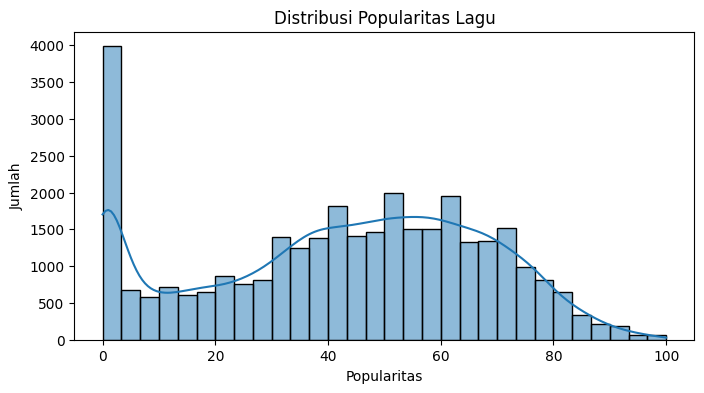

In [10]:
plt.figure(figsize=(8, 4))
sns.histplot(df['track_popularity'], bins=30, kde=True)
plt.title('Distribusi Popularitas Lagu')
plt.xlabel('Popularitas')
plt.ylabel('Jumlah')
plt.show()

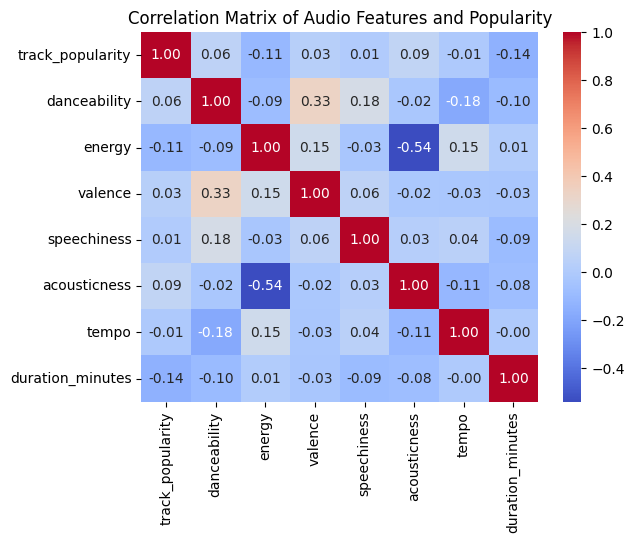

<Figure size 1200x1000 with 0 Axes>

In [11]:
features = ['danceability', 'energy', 'valence', 'speechiness', 'acousticness', 'tempo', 'duration_minutes']
correlations = df[['track_popularity'] + features].corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Audio Features and Popularity')
plt.figure(figsize=(12, 10))
plt.show()

Ini cukup menggambarkan bahwa fitur audio yang terdapat dalam fitur-fitur yang sudah di-list tadi memiliki korelasi hingga dapat berpengaruh terhadap variabel popularitas

```- Visualisasi Distribusi Fitur```

In [12]:
# Splitting features and target
x_df = df.drop('track_popularity',axis = 1)
y_df = df['track_popularity']

print(f'Shape of x_train {x_df.shape} and y_data {y_df.shape}')

Shape of x_train (32833, 23) and y_data (32833,)


```- Feature Removal ```

Untuk keperluan overviewing, beberapa kolom di-exclude hingga hasilnya cukup jelas untuk beberapa fitur yang ditujukan untuk keperluan analisis data.

In [13]:
x_df = x_df.select_dtypes(exclude=['object'])
x_df.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.748   0.916    6    -2.634     1       0.0583        0.1020   
1         0.726   0.815   11    -4.969     1       0.0373        0.0724   
2         0.675   0.931    1    -3.432     0       0.0742        0.0794   
3         0.718   0.930    7    -3.778     1       0.1020        0.0287   
4         0.650   0.833    1    -4.672     1       0.0359        0.0803   

   instrumentalness  liveness  valence    tempo  duration_ms  duration_minutes  
0          0.000000    0.0653    0.518  122.036       194754          3.245900  
1          0.004210    0.3570    0.693   99.972       162600          2.710000  
2          0.000023    0.1100    0.613  124.008       176616          2.943600  
3          0.000009    0.2040    0.277  121.956       169093          2.818217  
4          0.000000    0.0833    0.725  123.976       189052          3.150867

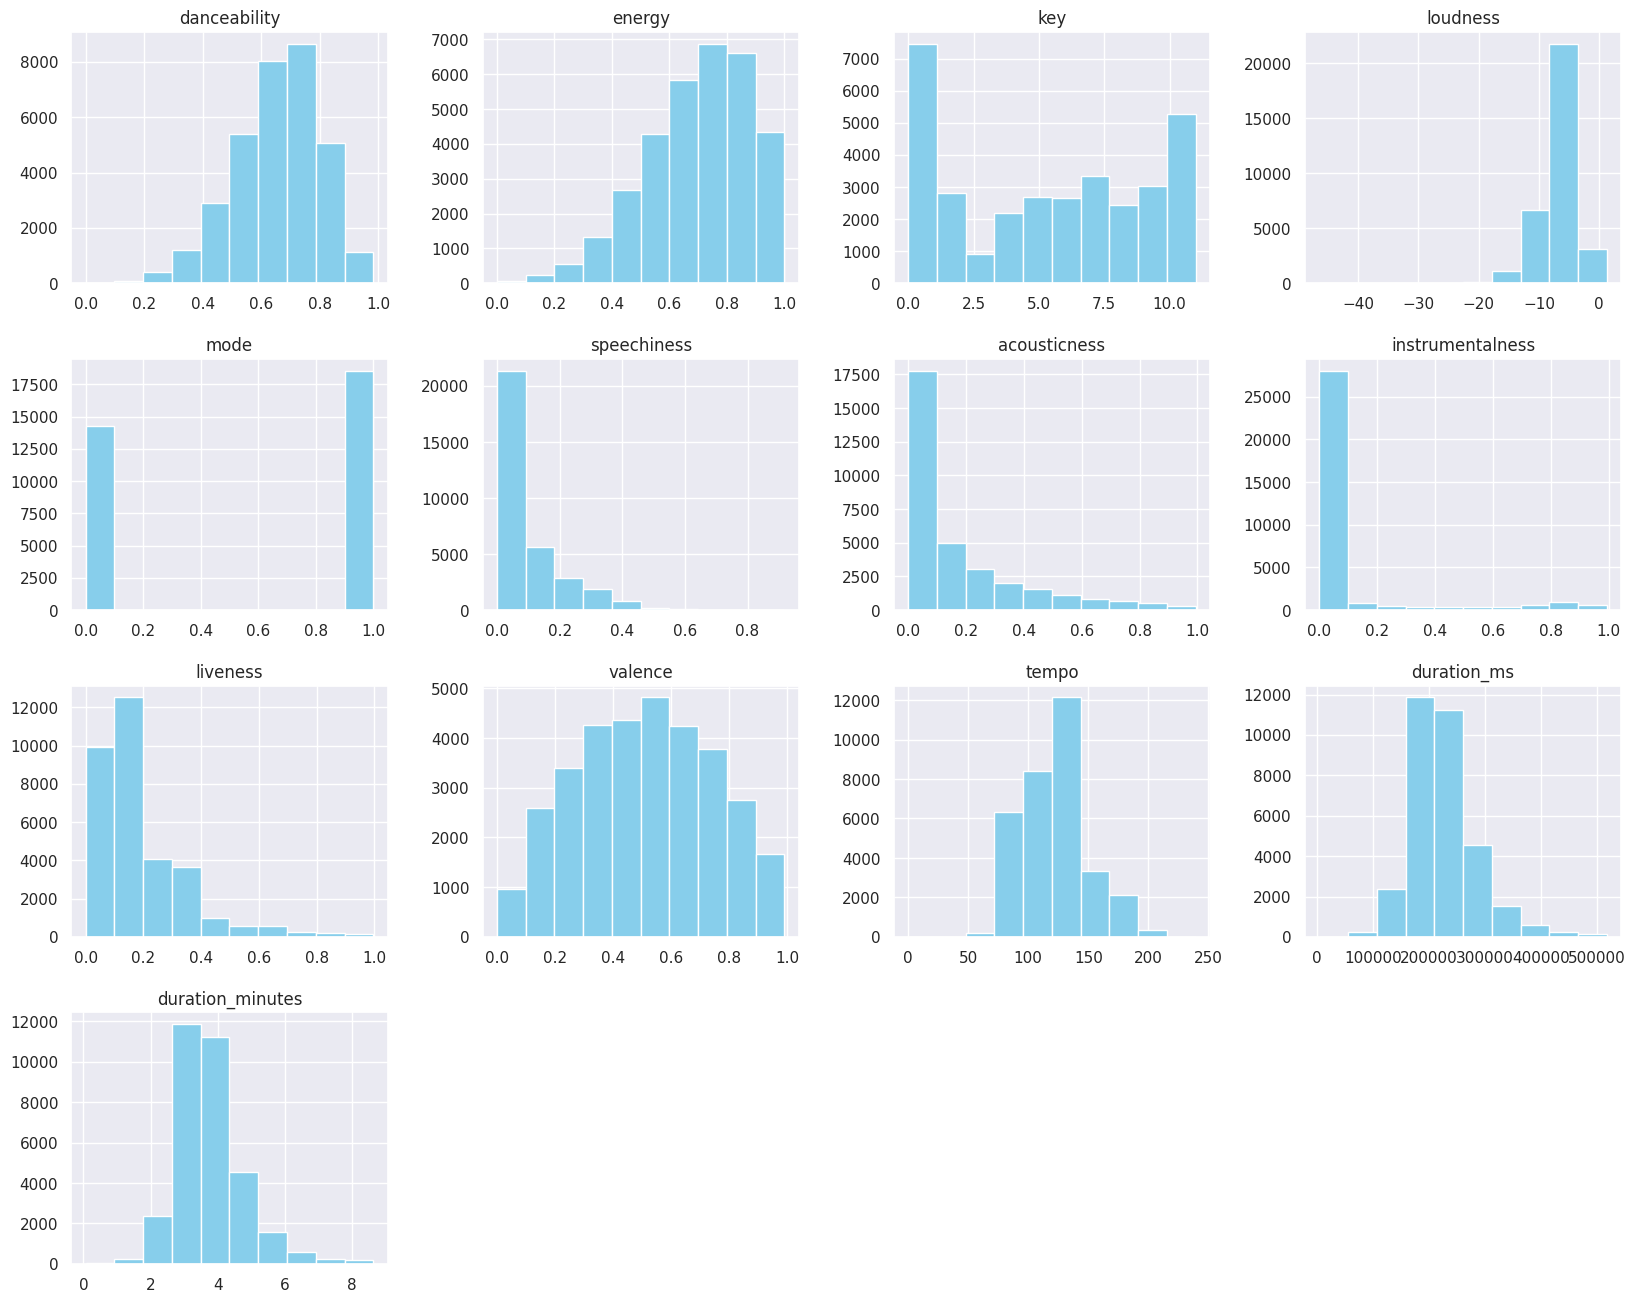

In [14]:
sns.set(rc={'figure.figsize': (20, 16)})
x_df.hist(color='skyblue');

Di atas adalah hasil dari visualisasi untuk masing-masing fitur terhadap popularitasnya. Fitur-fitur tersebut adalah ```danceability```, ```energy```, ```key```, ```loudness```, ```mode```, ```speechiness```, ```acousticness```, ```instrumentalness```, ```liveness```, ```valence```, ```tempo```, ```duration_ms```, dan ```duration_minutes```.

```- Visualisasi Distribusi menggunakan Corelation Heatmap```

Berikut untuk kalkulasi korelasi yang lebih jelas untuk popularitas lagu berdasarkan masing-masing fitur audio.

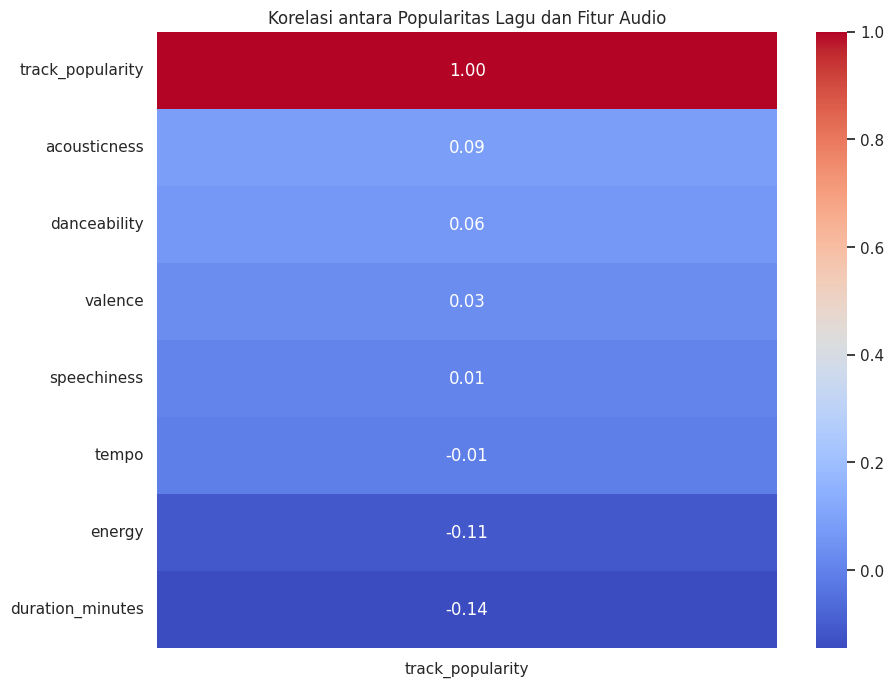

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations[['track_popularity']].sort_values(by='track_popularity', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antara Popularitas Lagu dan Fitur Audio')
plt.show()

Berikutnya, Lagu dengan popularitas >80 dianalisis untuk rata-rata karakteristik audio seperti energy, tempo, dan valence.

In [16]:
# Filter lagu populer (popularitas > 80)
popular_songs = df[df['track_popularity'] > 80]

In [17]:
popular_songs.head()

track_id                    track_name    track_artist  \
41  6oJ6le65B3SEqPwMRNXWjY                   Higher Love            Kygo   
43  3yNZ5r3LKfdmjoS3gkhUCT  bad guy (with Justin Bieber)   Billie Eilish   
71  0qc4QlcCxVTGyShurEv1UU      Post Malone (feat. RANI)       Sam Feldt   
72  5icOoE6VgqFKohjWWNp0Ac                  Here With Me      Marshmello   
74  4PkIDTPGedm0enzdvilLNd                       Sixteen  Ellie Goulding   

    track_popularity          track_album_id              track_album_name  \
41                87  4wquJImu8RtyEuDtIAsfcE                   Higher Love   
43                83  6lMlX68jJrx67hiCqdiDvW  bad guy (with Justin Bieber)   
71                83  41S9bfzXTSGK4HU2mp5qXH                    Magnets EP   
72                83  6NHS3hV16MZyfcp0nSHdrd                  Here With Me   
74                81  5AXNN75OmMjFrwst6ExNPx                       Sixteen   

   track_album_release_date playlist_name             playlist_id  \
41               2019-06-28     Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
43               2019-07-11     Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
71               2019-05-24     Dance Pop  37i9dQZF1DWZQaaqNMbbXa   
72               2019-03-08     Dance Pop  37i9dQZF1DWZQaaqNMbbXa   
74               2019-04-12     Dance Pop  37i9dQZF1DWZQaaqNMbbXa   

   playlist_genre  ... loudness  mode  speechiness  acousticness  \
41            pop  ...   -7.159     1       0.0324        0.0154   
43            pop  ...  -11.265     1       0.2950        0.2520   
71            pop  ...   -3.870     1       0.1220        0.0771   
72            pop  ...   -3.933     0       0.0439        0.0623   
74            pop  ...   -5.445     1       0.1360        0.2680   

    instrumentalness  liveness  valence    tempo  duration_ms  \
41          0.000006    0.1010    0.404  103.952       228267   
43          0.330000    0.1170    0.680  135.055       194840   
71          0.000000    0.1050    0.651  107.356       174444   
72          0.000000    0.1560    0.181   99.961       156347   
74          0.000000    0.0594    0.541  109.919       201072   

    duration_minutes  
41          3.804450  
43          3.247333  
71          2.907400  
72          2.605783  
74          3.351200  

[5 rows x 24 columns]

In [18]:
# Menghitung rata-rata karakteristik audio untuk lagu populer dan semua lagu
audio_features = ['loudness','danceability','energy', 'tempo', 'valence']
popular_audio_means = popular_songs[audio_features].mean()
overall_audio_means = df[audio_features].mean()

In [19]:
audio_comparison = pd.DataFrame({
    'Fitur Audio': audio_features,
    'Rata-rata Lagu Populer': popular_audio_means.values,
    'Rata-rata Semua Lagu': overall_audio_means.values
})

In [20]:
print("Perbandingan Karakteristik Audio:")
print(audio_comparison)

Perbandingan Karakteristik Audio:
    Fitur Audio  Rata-rata Lagu Populer  Rata-rata Semua Lagu
0      loudness               -6.032535             -6.719499
1  danceability                0.703477              0.654850
2        energy                0.633776              0.698619
3         tempo              120.100510            120.881132
4       valence                0.514912              0.510561


Lagu-lagu dibagi ke dalam tiga kategori berdasarkan durasi:

*   Pendek: Lagu dengan durasi kurang dari 2,5 menit.
*   Sedang: Lagu dengan durasi antara 2,5 hingga 5 menit.
*   Panjang: Lagu dengan durasi lebih dari 5 menit.





In [21]:
# Membagi durasi menjadi kategori
def categorize_duration(duration):
    if duration < 2:
        return 'Pendek'
    elif 2 <= duration <= 5:
        return 'Sedang'
    else:
        return 'Panjang'

In [22]:
df['duration_category'] = df['duration_minutes'].apply(categorize_duration)

In [23]:
# Menghitung rata-rata popularitas berdasarkan kategori durasi
duration_popularity = df.groupby('duration_category')['track_popularity'].mean().reset_index()
duration_popularity.columns = ['Durasi', 'Rata-rata Popularitas']

In [24]:
print("1. Rata-rata Popularitas Berdasarkan Durasi:")
print(duration_popularity)

1. Rata-rata Popularitas Berdasarkan Durasi:
    Durasi  Rata-rata Popularitas
0  Panjang              33.199028
1   Pendek              39.532258
2   Sedang              43.569981


Menghitung rata-rata popularitas berdasarkan kategori durasi

In [25]:
mode_popularity = df.groupby('mode')['track_popularity'].mean().reset_index()
mode_popularity['Mode'] = mode_popularity['mode'].replace({1: 'Mayor', 0: 'Minor'})
mode_popularity = mode_popularity[['Mode', 'track_popularity']]
mode_popularity.columns = ['Mode', 'Rata-rata Popularitas']


In [26]:
print("Rata-rata Popularitas Berdasarkan Mode:")
print(mode_popularity)

Rata-rata Popularitas Berdasarkan Mode:
    Mode  Rata-rata Popularitas
0  Minor              42.173785
1  Mayor              42.709917


#```- Visualization & Explanatory Analysis```

##```- Pertanyaan 1 : Karakteristik Musik Apa yang Membuat Lagu Popular?```

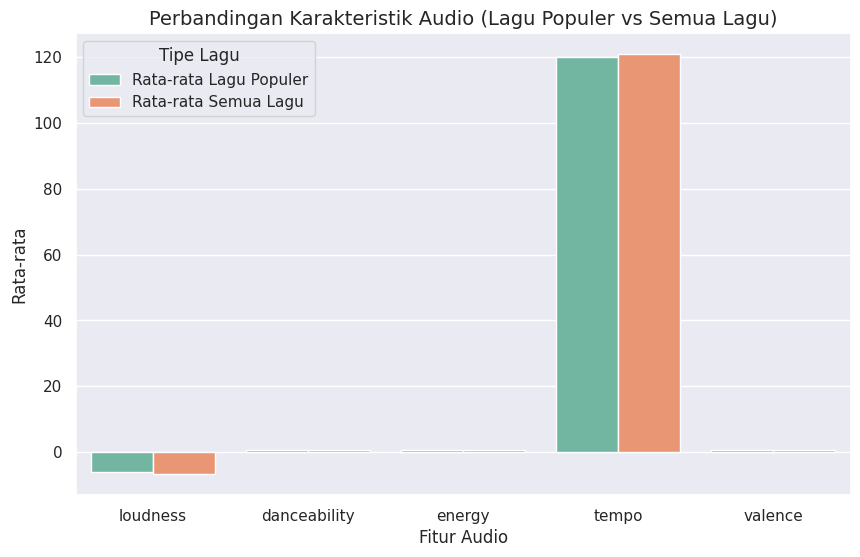

In [27]:
audio_comparison_melted = audio_comparison.melt(id_vars='Fitur Audio',
                                                 var_name='Tipe Lagu',
                                                 value_name='Rata-rata')

plt.figure(figsize=(10, 6))
sns.barplot(x='Fitur Audio', y='Rata-rata', hue='Tipe Lagu', data=audio_comparison_melted, palette='Set2')
plt.title('Perbandingan Karakteristik Audio (Lagu Populer vs Semua Lagu)', fontsize=14)
plt.xlabel('Fitur Audio', fontsize=12)
plt.ylabel('Rata-rata', fontsize=12)
plt.legend(title='Tipe Lagu')
plt.show()

Berdasarkan visualisasi diatas dapat diketahui bahwa :


*   Lagu populer memiliki **loudness** rata-rata -6.033 dB, lebih keras dibandingkan semua lagu (-6.719 dB).

*   Lagu populer memiliki rata-rata 0.703, lebih tinggi dibandingkan semua lagu (0.655). Jadi, **Danceability** tinggi lebih disukai oleh pendengar, terutama untuk lagu yang populer di kalangan audiens yang menyukai musik dengan ritme yang menarik

*  Lagu populer memiliki **energy** rata-rata 0.634, sedikit lebih rendah dibandingkan semua lagu (0.699).

*   Lagu populer memiliki rata-rata **Tempo** 120.10 BPM, hampir sama dengan semua lagu (120.88 BPM).

*   Lagu populer memiliki rata-rata **Valance** 0.515, sedikit lebih tinggi dibandingkan semua lagu (0.511).
Lagu dengan nuansa positif atau ceria cenderung sedikit lebih disukai oleh pendengar.















##```- Pertanyaan 2 : Apakah Lagu dengan Durasi Tertentu Lebih Cenderung Populer?```

<ipython-input-28-3e72283f0fbc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Durasi', y='Rata-rata Popularitas', data=duration_popularity, palette='Blues_d')


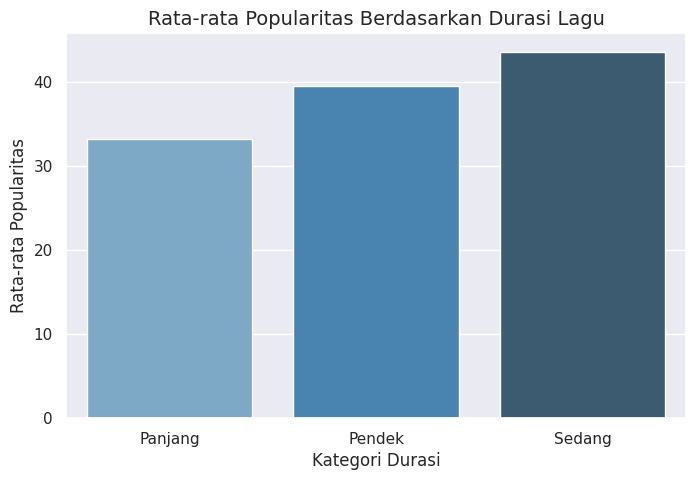

In [28]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Durasi', y='Rata-rata Popularitas', data=duration_popularity, palette='Blues_d')
plt.title('Rata-rata Popularitas Berdasarkan Durasi Lagu', fontsize=14)
plt.xlabel('Kategori Durasi', fontsize=12)
plt.ylabel('Rata-rata Popularitas', fontsize=12)
plt.show()

Berikut untuk keterangan lebih lanjut berkaitan dengan kategorisasi durasi lagu yang kami buat sebelumnya :
*   Pendek: Lagu dengan durasi kurang dari 2,5 menit.
*   Sedang: Lagu dengan durasi antara 2,5 hingga 5 menit.
*   Panjang: Lagu dengan durasi lebih dari 5 menit.


Berdasarkan visualisasi diatas dapat diketahui bahwa :


*   Lagu dengan durasi Panjang memiliki rata-rata popularitas : 33.20, jadi lagu berdurasi panjang memiliki tingkat popularitas terendah.
*   Lagu dengan durasi Pendek memiliki rata-rata popularitas : 39.53, jadi lagu berdurasi Pendek memiliki tingkat popularitas lebih tinggi dari lagu panjang.
*   Lagu durasi Sedang memiliki rata-rata popularitas : 43.57, yang merupakan Lagu dengan popularitas tertinggi.




##```- Pertanyaan 3 : Apakah Lagu dengan Mode Mayor Lebih Populer daripada Lagu dengan Mode Minor?```

 Apakah Lagu dengan Mode Mayor Lebih Populer daripada Lagu dengan Mode Minor?

<ipython-input-29-9b8d91a8818c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mode', y='Rata-rata Popularitas', data=mode_popularity, palette='Pastel2')


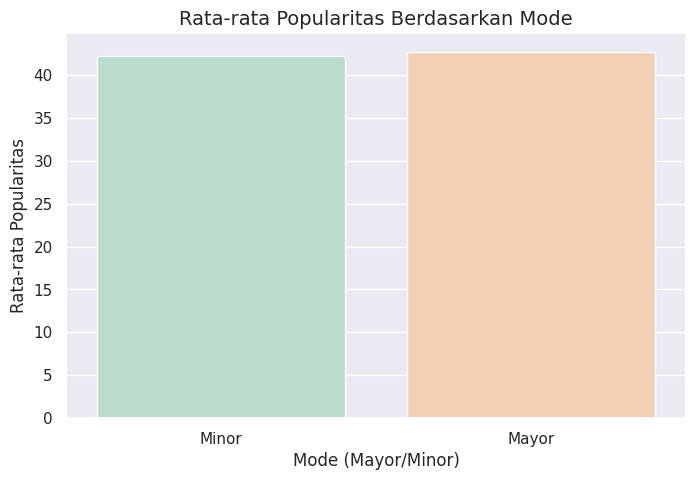

In [29]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Mode', y='Rata-rata Popularitas', data=mode_popularity, palette='Pastel2')
plt.title('Rata-rata Popularitas Berdasarkan Mode', fontsize=14)
plt.xlabel('Mode (Mayor/Minor)', fontsize=12)
plt.ylabel('Rata-rata Popularitas', fontsize=12)
plt.show()


Mode dalam teori musik mengacu pada nuansa atau "feel" sebuah lagu, yang dapat memengaruhi emosi pendengar. Ada dua jenis mode utama:


*   **Mayor**. Lagu-lagu dengan mode mayor biasanya terdengar ceria, optimis, atau bahagia.
*   **Minor**. Lagu-lagu dengan mode minor sering kali terdengar melankolis, sedih, atau serius.


Berdasarkan visualisasi diatas dapat diketahui bahwa :


*   Lagu dengan mode minor sedikit kurang populer dibandingkan lagu dengan mode mayor. dengan Rata-rata Popularitas: 42.17
*   Lagu dengan mode mayor memiliki rata-rata popularitas yang sedikit lebih tinggi dibandingkan lagu dengan mode minor. Dengan Rata-rata Popularitas: 42.71





##```- Pertanyaan 4 : Apakah Lagu dengan Karakteristik Tertentu Lebih Disukai untuk Aktivitas Tertentu?```

Bagaimana Hubungan dari masing-masing popularitas yang ada dapat mempengaruhi metrik yang terdapat pada fitur lain? Pertama, kita akan memperhatikan mengenai persebaran dari masing-masing popularitas berdasarkan nilai dari masing-masing fitur yang ada. Mencari hubungan dari fitur karakteristik dengan fitur yang berkaitan dengan aktivitas tertentu dapat dilakukan dengan membedakan keduanya terlebih dahulu.

Di sini fitur yang menjadi target untuk digunakan sebagai indikator aktivitas adalah fitur ```danceability``` dan fitur ```energy```. Hal ini cukup jelas untuk fitur ```danceability``` yang digunakan sebagai metrik penanda aktivitas tertentu, dan tidak dengan ```energy```. Hanya saja, di dalam projek ini, kami ingin mencari hubungannya, dengan menggunakan metrik berdasarkan deskripsi yang digunakan untuk mendefinisikan masing-masing fitur yang ada.

Fitur ```energy``` digunakan untuk menandakan seberapa seseorang merasa bersemangat atau bertenaga sebagai respons terhadap input yang diberikan berupa songtrack yang ada. Energy yang bersemangat mengindikasikan kegiatan yang intens dengan interval hingga 1.0, sedangkan sebaliknya, Energy yang rendah atau mendekati 0.0 mengindikasikan kondisi individu yang kurang bersemangat, letih, atau berada dalam kondisi yang negatif.

In [30]:
import plotly.express as px

plot_df = df.copy()
plot_df.columns = plot_df.columns.str.replace("_", " ").str.title()

fig = px.parallel_coordinates(
    pd.concat([plot_df.select_dtypes(float), plot_df['Track Popularity']], axis=1),
    color="Track Popularity",
    color_continuous_scale=px.colors.diverging.Spectral,
    color_continuous_midpoint=5,
    labels={'Track Popularity': 'Popularity'},
)
fig.update_layout(
    title={
        'text': "Persebaran popularitas berdasarkan masing-masing features",
        'x': 0.5,
        'y': 0.99,
        'xanchor': 'center'
    },
    margin=dict(t=80)
)
fig.show()

###``` - Korelasi dari berbagai fitur terhadap fitur danceability```

Hasil visualisasi yang didapat cukup signifikan, selanjutnya akan dilakukan eksplorasi lebih lanjut untuk menjawab pertanyaan tadi, serta memberikan jawaban yang lebih spesifik. Sehingga butuh untuk mencari perbandingan dari pengaruh masing-masing fitur tersebut terhadap fitur yang ditargetkan.

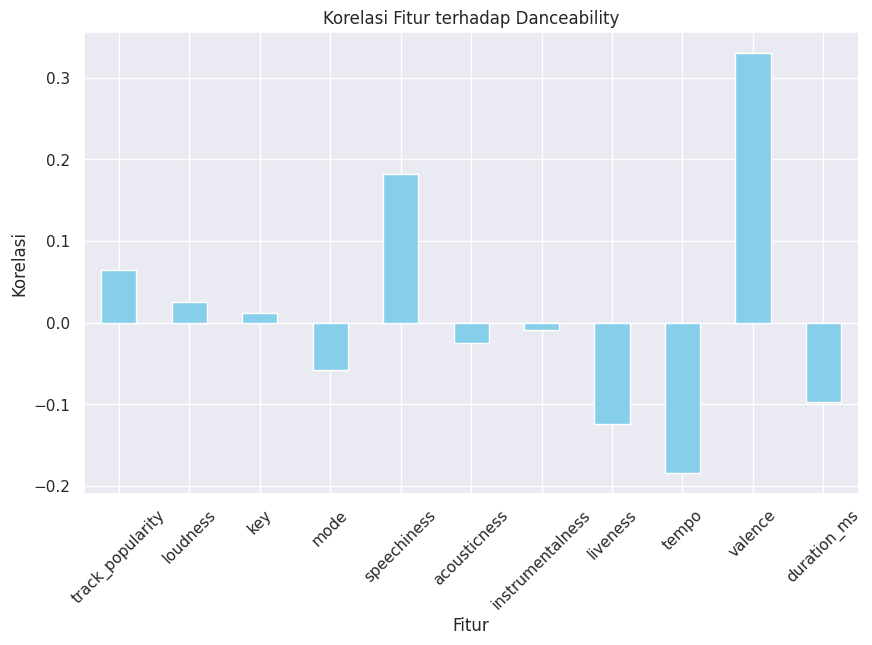

In [31]:
# Fitur yang akan dibandingkan
comparison_features = [
    'track_popularity', 'loudness', 'key', 'mode', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'tempo', 'valence', 'duration_ms'
]

# Menghitung korelasi terhadap danceability dan energy
comparison_data = df[comparison_features + ['danceability', 'energy']].corr()

# Memfilter korelasi yang relevan
danceability_correlations = comparison_data['danceability'].sort_values(ascending=False)
energy_correlations = comparison_data['energy'].sort_values(ascending=False)

# Visualisasi korelasi terhadap danceability
plt.figure(figsize=(10, 6))
danceability_correlations[comparison_features].plot(kind='bar', color='skyblue')
plt.title('Korelasi Fitur terhadap Danceability')
plt.xlabel('Fitur')
plt.ylabel('Korelasi')
plt.xticks(rotation=45)
plt.show()

###``` - Korelasi fitur karakteristik terhadap fitur Energy```

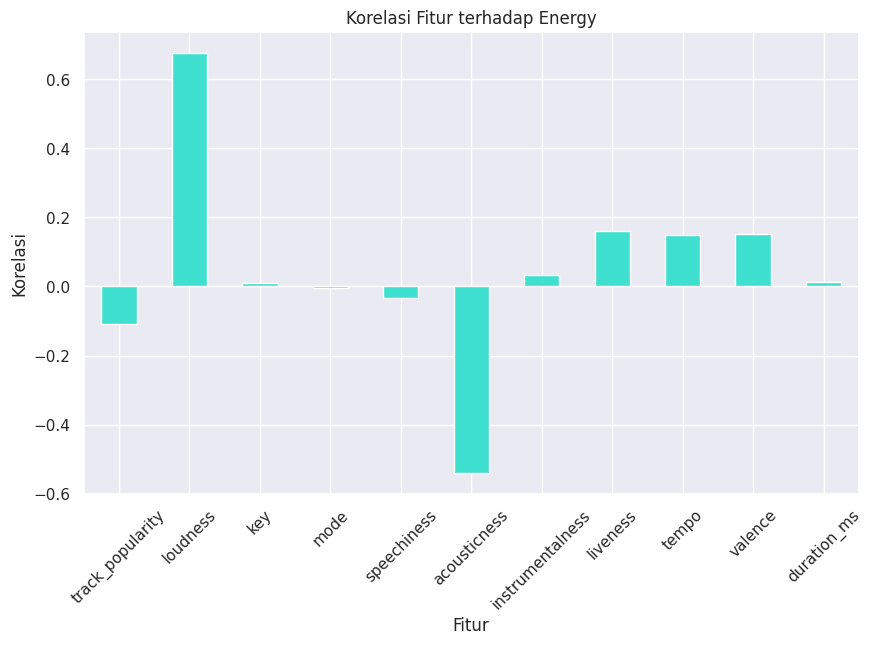

(track_popularity    0.064748
 loudness            0.025335
 key                 0.011736
 mode               -0.058647
 speechiness         0.181721
 acousticness       -0.024519
 instrumentalness   -0.008655
 liveness           -0.123859
 tempo              -0.184084
 valence             0.330523
 duration_ms        -0.096879
 Name: danceability, dtype: float64,
 track_popularity   -0.109112
 loudness            0.676625
 key                 0.010052
 mode               -0.004800
 speechiness        -0.032150
 acousticness       -0.539745
 instrumentalness    0.033247
 liveness            0.161223
 tempo               0.149951
 valence             0.151103
 duration_ms         0.012611
 Name: energy, dtype: float64)

In [32]:
# Visualisasi korelasi terhadap energy
plt.figure(figsize=(10, 6))
energy_correlations[comparison_features].plot(kind='bar', color='turquoise')
plt.title('Korelasi Fitur terhadap Energy')
plt.xlabel('Fitur')
plt.ylabel('Korelasi')
plt.xticks(rotation=45)
plt.show()

# Output korelasi untuk analisis
danceability_correlations[comparison_features], energy_correlations[comparison_features]


Berikut untuk hasil korelasi dari kedua perbandingan tersebut, yang pertama untuk fitur ```danceability```:

1. Korelasi Positif :
*  Nilai ```Valence``` pada 0.33 menunjukkan lagu dengan emosi positif memiliki indikator danceability yang lebih tinggi
*  Nilai ```speechiness``` pada 0.18 menunjukkan kehadiran lirik mengingkatkan kecocokan lagu untuk menari dan menggugah pendengarnya.
*  Nilai ```track_popularity``` pada 0.06 menunjukkan bahwa lagu populer memiliki hubungan positif yang kecil dengan danceability

2. Korelasi Negatif :
*  Nilai fitur ```tempo``` pada -0.18 menunjukkan bahwa lagu dengan tempo sangat cepat cenderung kurang cocok untuk menari.
*  Nilai fitur ```liveness``` yang berada pada -0.12 menunjukkan bahwa track live memiliki danceability yang lebih rendah.

Dan untuk hasil dari korelasi menggunakan target fitur ```energy``` :

1. Korelasi Positif :

*  Nilai ```loudness``` pada 0.68 menunjukkan bahwa lagu yang lebih keras memiliki energi yang lebih tinggi.
*  Nilai ```liveness``` pada 0.16 menunjukkan bahwa rekaman live sedikit meningkatkan energi lagu.
*  Nilai ```valence``` pada 0.15 menunjukkan bahwa lagu ceria cenderung memiliki energi lebih tinggi.
*  Nilai ```tempo``` pada 0.15 menunjukkan kecepatan beat juga berkontribusi pada energi lagu.

2. Korelasi Negatif:

* Nilai ```acousticness``` pada -0.54 menunjukkan bahwa lagu dengan elemen akustik cenderung memiliki energi yang lebih rendah.
*  Nilai ```track_popularity``` yang berada pada -0.11 menunjukkan bahwa popularitas lagu memiliki hubungan negatif kecil dengan energi.

Dari kedua perbandingan tersebut dapat disimpulkan bahwa terdapat interaksi antara aktivitas tertentu yang berkaitan dengan lagu yang didengarkan. Hal ini dapat diindikasikan melalui kedua fitur yang telah dibandingkan, yakni ```danceability``` dan fitur ```energy``` yang mana masing-masingnya dipengaruhi oleh elemen emosional yang dapat diindikasikan oleh fitur ```valence``` dan ```speechiness```, sedangkan fitur ```energy``` lebih dipengaruhi oleh elemen teknis, seperti ```loudness``` dan ```tempo```.

##```- Pertanyaan 5 : Bagaimana Hubungan Genre dengan Popularitas Lagu?```

Untuk menjawab pertanyaan ini, kita butuh mem-breakdown beberapa sisi dataset, termasuk pembagian genre. Pertama kami ingin melihat persebaran dari genre dan subgenre lagu berdasarkan popularitas. Dalam sel di bawah ini, kami menggunakan fitur ```playlist_genre``` dan ```playlist_subgenre``` yang masing-masingnya kami labeli dengan bentuk tertentu berdasarkan kuantitas popularitasnya dari fitur ```track_popularity```

In [33]:
plot_df[['Playlist Genre', 'Playlist Subgenre']] = plot_df[['Playlist Genre', 'Playlist Subgenre']] \
                                                  .apply(lambda x: x.str.capitalize(), axis=1)

fig = px.sunburst(
    plot_df,
    path=['Playlist Genre', 'Playlist Subgenre'],
    color='Track Popularity',
    labels={'Track Popularity': 'Popularity'},
)
fig.update_traces(
    hovertemplate="<b>%{label}</b><br><br>Count=%{value}<br>Popularity=%{color:.2f}<extra></extra>"
)
fig.update_layout(
    title={
        'text':"Genre and Subgenre Popularity",
        'x': 0.47,
        'y': 0.95,
        'xanchor': 'center'
    },
    margin=dict(t=70)
)
fig.show()

Setelahnya, dilakukan penghitungan untuk rata-rata dari popularitas masing-masing genre.

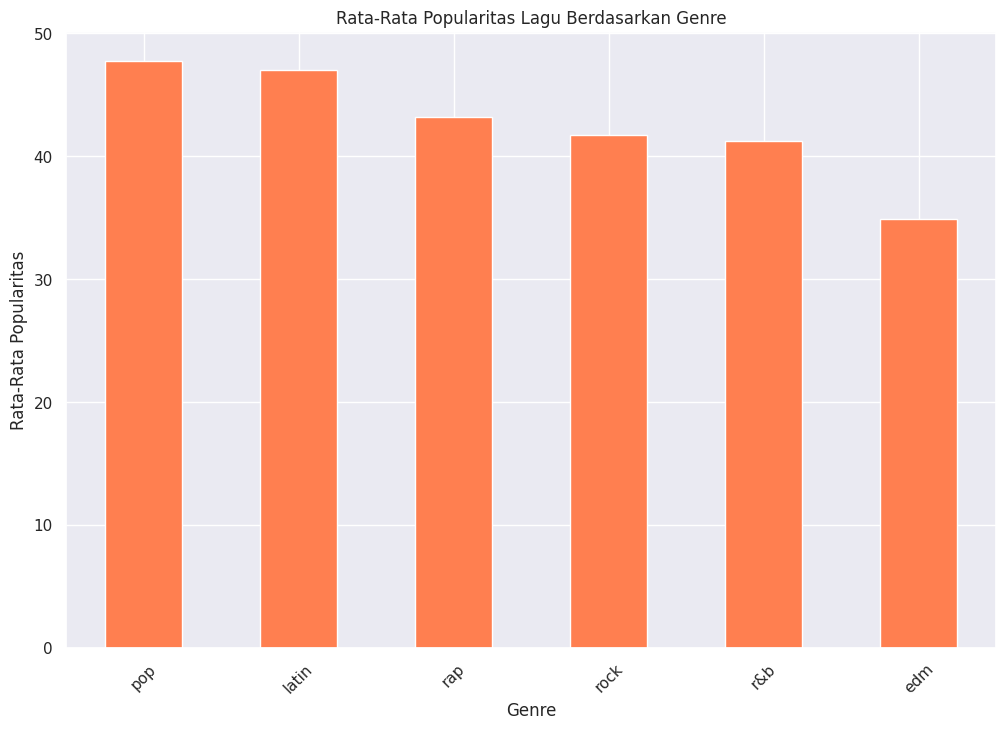

In [34]:
genre_popularity = df.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)

# Visualisasi rata-rata popularitas per genre
plt.figure(figsize=(12, 8))
genre_popularity.plot(kind='bar', color='coral')
plt.title('Rata-Rata Popularitas Lagu Berdasarkan Genre')
plt.xlabel('Genre')
plt.ylabel('Rata-Rata Popularitas')
plt.xticks(rotation=45)
plt.show()

Hingga setelahnya menggunakan model distribusi untuk memetakan popularitas lagu berdasarkan genre dengan menggunakan boxplot.

<ipython-input-35-3a940df0b777>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




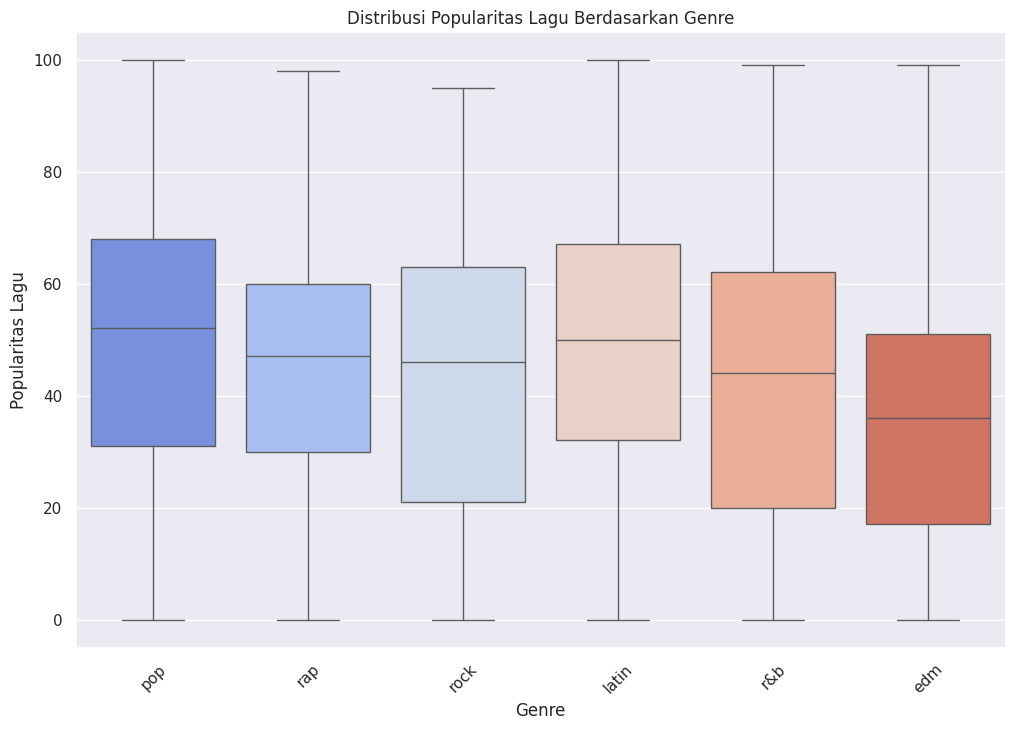

playlist_genre
pop      47.744870
latin    47.026576
rap      43.215454
rock     41.728338
r&b      41.223532
edm      34.833526
Name: track_popularity, dtype: float64

In [35]:
# Distribusi popularitas untuk setiap genre menggunakan boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='playlist_genre', y='track_popularity', palette='coolwarm')
plt.title('Distribusi Popularitas Lagu Berdasarkan Genre')
plt.xlabel('Genre')
plt.ylabel('Popularitas Lagu')
plt.xticks(rotation=45)
plt.show()

# Output rata-rata popularitas per genre untuk analisis lebih lanjut
genre_popularity

Hasil analisis menunjukkan rata-rata dan distribusi ```track_popularity``` berdasarkan fitur ```genre```. Pada diagram lingkaran pertama menunjukkan banyak genre dengan masing-masing jumlah popularitasnya dan berapa skalanya dalam rentang interval dari 0 hingga 100. Distribusi yang dilakukan berdasarkan rata-rata popularitas masing-masing genre menunjukkan bahwa Genre Pop memiliki rata-rata popularitas tertinggi (47.74), diikuti oleh Latin (47.03) dan Rap (43.22). Genre dengan rata-rata popularitas lebih rendah termasuk EDM (34.83).

Sedangkan berdasarkan distribusi popularitas menggunakan boxplot menunjukkan bahwa genre seperti Pop memiliki distribusi popularitas yang lebih merata dengan nilai maksimum yang lebih tinggi. Genre seperti EDM memiliki variasi popularitas yang lebih rendah.

##```- Pertanyaan 6 : Bagaimana Preferensi Musik berubah berdasarkan Waktu dan Aktivitas?```

Bagaimana hubungan dari masing-masing popularitas mempengaruhi minat pendengar lagu terhadap artis yang lagunya cukup dinikmati? Di bawah ini dilakukan pemetaan menggunakan treemap untuk menunjukkan overview dari banyak artist dengan popularitas yang diurutkan dari yang tertinggi hingga terendah, nilai fitur ```popularity``` diakumulasikan untuk masing-masing artist dari nilai ```popularity``` pada lagu/track nya.

In [36]:
fig = px.treemap(
    plot_df.groupby(['Track Artist', 'Track Name'])['Track Popularity'].mean().sort_values(ascending=False).reset_index()[:100],
    path=[px.Constant("Artists"), 'Track Artist', 'Track Name'],
    values='Track Popularity',
    color_discrete_sequence=px.colors.diverging.Portland,
    labels={'Track Popularity': 'Popularity'},
)
fig.update_traces(
    hovertemplate="<b>%{label}</b><br><br>Popularity=%{value:.2f}<extra></extra>"
)
fig.update_layout(
    title={
        'text':"Most popular tracks for Artist",
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center'
    },
    margin=dict(t=70)
)
fig.show()

Setelahnya, kami membuat scatter plot untuk memetakan bagaimana persebaran dari masing-masing popularitas lagu berdasarkan tanggal rilisnya.

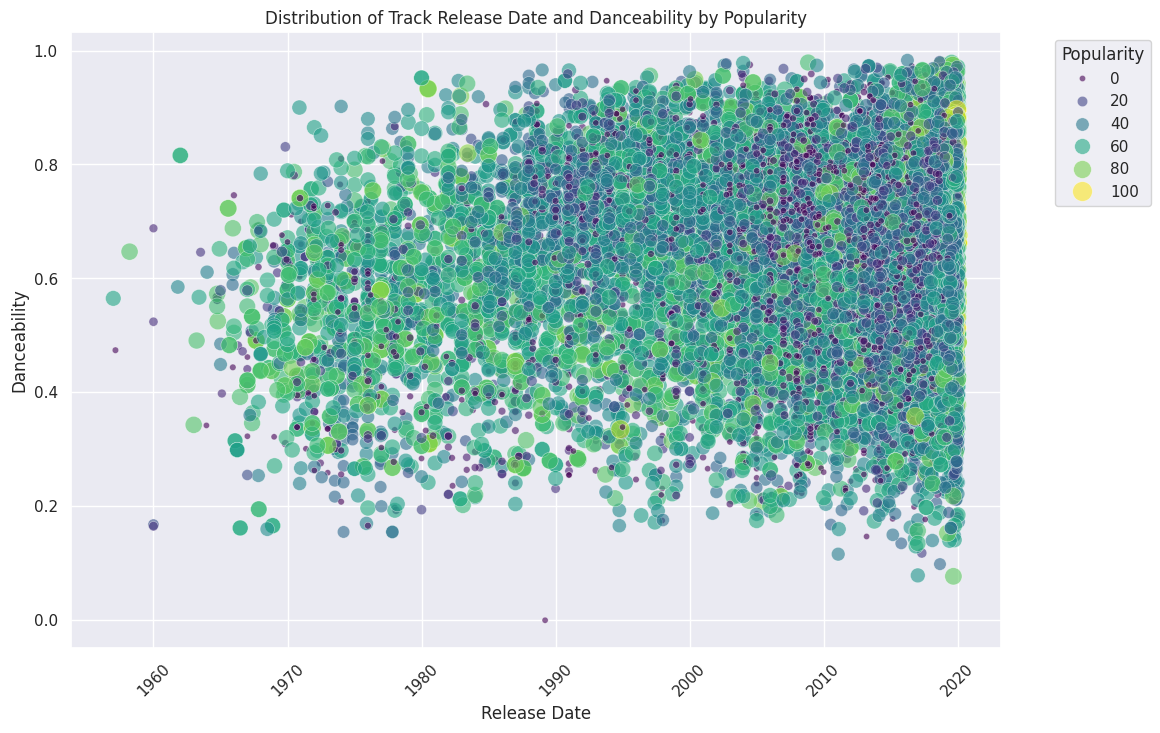

In [37]:
# Ubah `track_album_release_date` ke datetime dengan penanganan format campuran
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], format='mixed', errors='coerce')

# Scatter plot tanggal rilis vs danceability yang diwarnai berdasarkan popularitas
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='track_album_release_date', y='danceability', hue='track_popularity',
                size='track_popularity', alpha=0.6, sizes=(20, 200), palette='viridis')
plt.title('Distribution of Track Release Date and Danceability by Popularity')
plt.xlabel('Release Date')
plt.ylabel('Danceability')
plt.legend(title='Popularity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

Karena hasil yang ditunjukkan terlalu spesifik, kami persempit distribusinya yang pada awalnya berdasarkan tanggal rilis menjadi tahun rilis dari masing-masing lagu.

In [38]:
# mengekstrak tahun dari tanggal rilis
popularity_by_year = df.dropna(subset=['track_album_release_date'])
popularity_by_year['release_year'] = popularity_by_year['track_album_release_date'].dt.year

# Pengelompokan berdasarkan tahun dan penjumlahan popularitas
popularity_by_year_summary = popularity_by_year.groupby('release_year')['track_popularity'].sum()

# Mengonversi ke DataFrame untuk keterbacaan yang lebih baik
popularity_by_year_table = popularity_by_year_summary.reset_index()
popularity_by_year_table.columns = ['Year', 'Total Popularity']

# Menampilkan tabel total popularitas menurut tahun
popularity_by_year_table.sort_values(by='Year')


Year  Total Popularity
0   1957                60
1   1958                73
2   1960                64
3   1961                47
4   1962               128
..   ...               ...
58  2016             81582
59  2017            101395
60  2018            151950
61  2019            466786
62  2020             36472

[63 rows x 2 columns]

In [39]:
# Memilih 10 tahun teratas dengan total popularitas tertinggi
top_10_years = popularity_by_year_table.sort_values(by='Total Popularity', ascending=False).head(10)

# Menampilkan 10 tahun teratas
top_10_years

Year  Total Popularity
61  2019            466786
60  2018            151950
59  2017            101395
58  2016             81582
57  2015             63926
56  2014             45741
62  2020             36472
54  2012             30640
55  2013             30254
53  2011             22722

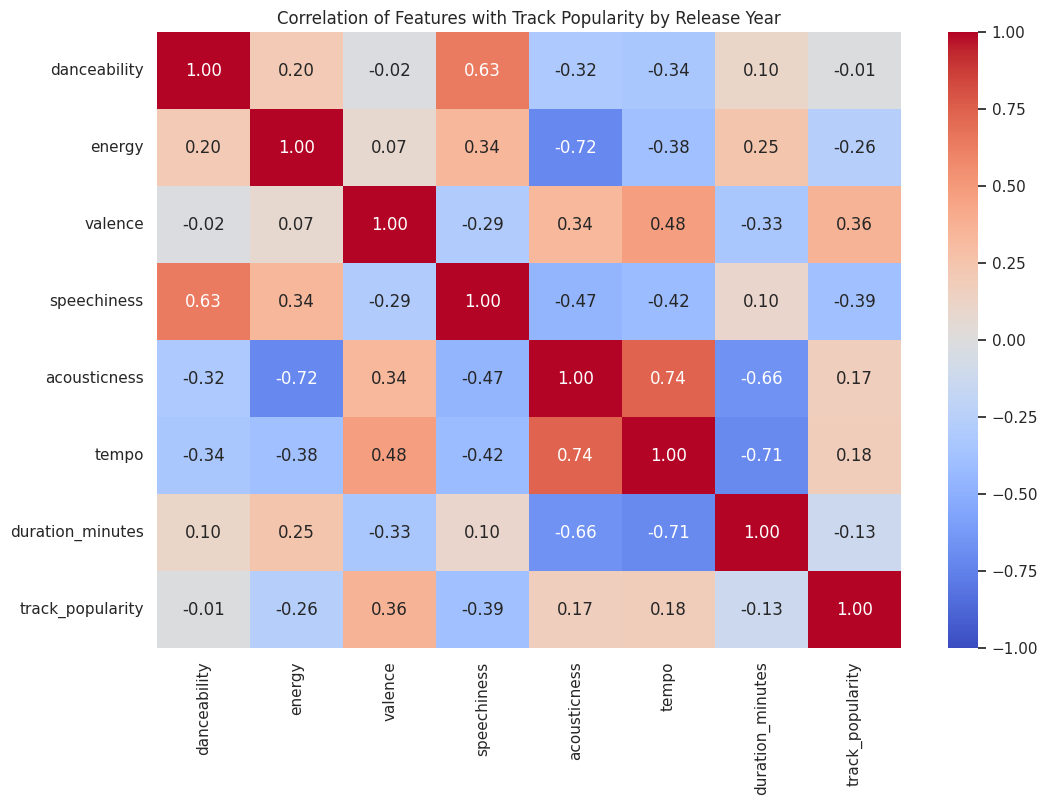

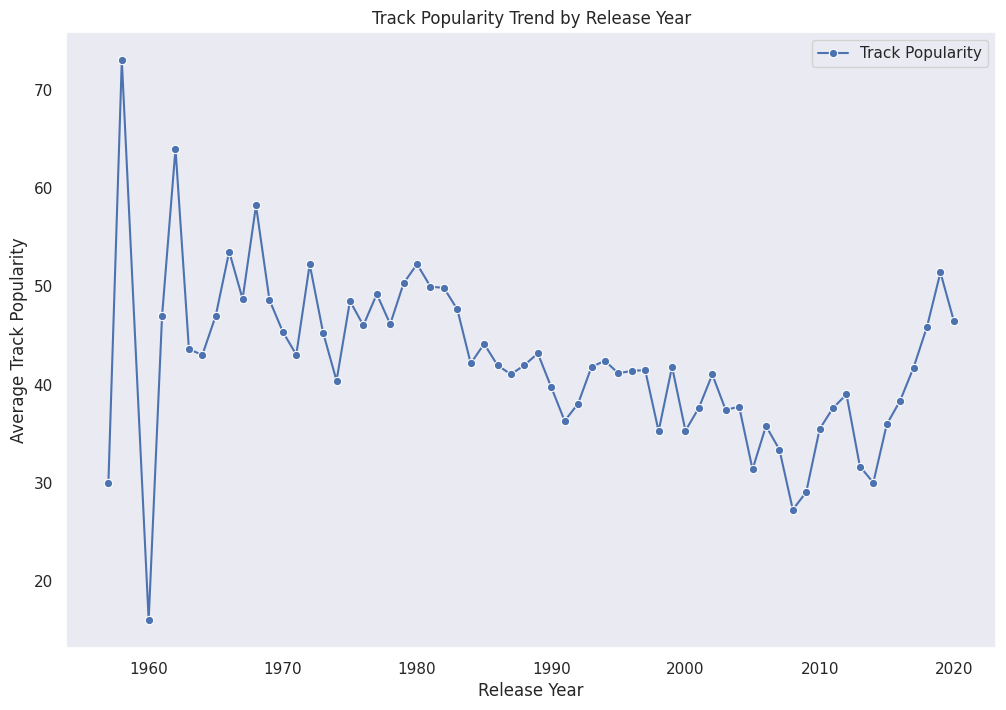

In [40]:
# Korelasi antara tahun rilis dan fitur lainnya
feature_correlation = df.dropna(subset=['track_album_release_date'])
feature_correlation['release_year'] = feature_correlation['track_album_release_date'].dt.year

# Memilih fitur untuk analisis korelasi
features = ['danceability', 'energy', 'valence', 'speechiness', 'acousticness', 'tempo', 'duration_minutes']
correlation_data = feature_correlation.groupby('release_year')[features + ['track_popularity']].mean()

# Menghitung korelasi
correlation_matrix = correlation_data.corr()

# Memvisualisasikan matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation of Features with Track Popularity by Release Year')
plt.show()

# Plot garis untuk memvisualisasikan tren popularitas tahunan
plt.figure(figsize=(12, 8))
sns.lineplot(data=correlation_data, x=correlation_data.index, y='track_popularity', label='Track Popularity', marker='o')
plt.title('Track Popularity Trend by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Track Popularity')
plt.grid()
plt.legend()
plt.show()


Visualisasi yang dihasilkan memberikan gambaran berupa heatmap korelasi untuk menunjukkan hubungan antara ```track_popularity``` dengan tanggal rilis track yang menggunakan fitur ```track_album_release_date``` yang juga di-grouping hingga hanya menggunakan tahun sebagai acuannya dan membuat fitur baru barupa ```release_year```. Dari visualisasi heatmap korelasi menunjukkan terdapat Korelasi antara berbagai fitur audio (```danceability```, ```energy```, dll.) dan ```track_popularity``` menunjukkan hubungan linier rata-rata setiap tahun. Sebagai contoh:
Fitur seperti ```danceability``` memiliki korelasi kecil positif terhadap popularitas. ```acousticness``` cenderung memiliki korelasi negatif.

Sedangkan Line Plot Popularitas Lagu per Tahun menunjukkan Rata-rata popularitas lagu berdasarkan tahun rilis yang merujuk pada tren umum. Popularitas meningkat secara signifikan dalam beberapa tahun terakhir (2015-2019). Berdasarkan data, pada era sebelum 2015 lagu-lagu yang ada cenderung memiliki elemen akustik-terindikasi dari fitur  ```acousticness``` yang lebih kuat, yang menunjukkan preferensi terhadap musik yang lebih tenang. Sedangkan pada era setelah 2015-an, preferensi beralih ke musik dengan fitur indikator berupa ```danceability```, ```energy```, dan ```valence``` yang lebih tinggi. Ini bisa jadi mencerminkan peningkatan konsumsi musik dengan tujuan aktivitas sosial, olahraga, atau hiburan aktif.

Sehingga dapat disimpulkan bahwa preferensi musik telah berubah secara signifikan berdasarkan waktu, beralih dari elemen akustik menuju musik elektronik dan energik yang lebih cocok untuk aktivitas aktif dan sosial. Platform streaming memainkan peran besar dalam mempercepat pergeseran ini, mempermudah akses dan pengaruh global terhadap selera musik. Selain itu juga banyak faktor eksternal yang turut memiliki andil dalam peralihan tersebut.

##```- Conclusion```

1. Lagu populer cenderung memiliki volume yang lebih keras, yang membuatnya terdengar lebih menarik dan energik bagi pendengar. Danceability yang lebih tinggi pada lagu populer menunjukkan bahwa ritme yang stabil dan mudah diikuti menjadi faktor penting dalam menarik audiens. Tingkat energi pada lagu populer tidak selalu menjadi faktor utama popularitas, meskipun intensitasnya sedikit lebih rendah dibandingkan rata-rata. Tempo moderat pada lagu populer menunjukkan fleksibilitasnya untuk berbagai suasana, sehingga menjadi pilihan yang umum. Selain itu, lagu populer cenderung memiliki nuansa yang sedikit lebih ceria atau positif, meskipun perbedaannya dengan lagu lain tidak terlalu signifikan.


2. Lagu berdurasi panjang cenderung kurang populer karena durasinya yang lama dapat mengurangi minat pendengar, sementara lagu berdurasi pendek lebih menarik karena mudah diulang. Namun, lagu dengan durasi sedang adalah yang paling populer karena memberikan pengalaman mendengarkan yang memadai tanpa terlalu panjang atau terlalu singkat.

3. Lagu dengan mode mayor sedikit lebih populer daripada lagu dengan mode minor, meskipun perbedaannya tidak terlalu besar. Emosi ceria yang ditimbulkan oleh lagu mayor mungkin menjadi faktor yang membuatnya lebih disukai. Meskipun begitu lagu minor tetap relevan karena pendengar sering mencari musik untuk suasana hati yang melankolis atau reflektif.

4. Hasil analisis menunjukkan bahwa elemen emosional seperti valence dan speechiness berkontribusi pada tingkat danceability sebuah lagu. Lagu dengan emosi positif (valence) dan lirik yang menggugah pendengar (speechiness) cenderung lebih mudah untuk ditari. Sebaliknya, lagu dengan tempo sangat cepat dan elemen live cenderung kurang cocok untuk menari. Hal ini menunjukkan bahwa danceability lebih dipengaruhi oleh faktor emosional dan konten lirik yang mendukung aktivitas menari.

  Untuk fitur energy, elemen teknis seperti loudness dan tempo berperan besar dalam menentukan tingkat energi sebuah lagu. Lagu yang lebih keras (loudness) dan memiliki tempo cepat cenderung memiliki energi yang lebih tinggi, sementara lagu dengan elemen akustik (acousticness) lebih rendah energinya. Popularitas lagu juga menunjukkan korelasi negatif kecil dengan energi, menunjukkan bahwa lagu populer tidak selalu memiliki energi yang tinggi. Secara keseluruhan, danceability dan energy dipengaruhi oleh kombinasi antara elemen emosional dan teknis yang membentuk karakteristik lagu.
5. Hasil analisis menunjukkan rata-rata dan distribusi ```track_popularity``` berdasarkan fitur ```genre```. Pada diagram lingkaran pertama menunjukkan banyak genre dengan masing-masing jumlah popularitasnya dan berapa skalanya dalam rentang interval dari 0 hingga 100. Distribusi yang dilakukan berdasarkan rata-rata popularitas masing-masing genre menunjukkan bahwa Genre Pop memiliki rata-rata popularitas tertinggi (47.74), diikuti oleh Latin (47.03) dan Rap (43.22). Genre dengan rata-rata popularitas lebih rendah termasuk EDM (34.83). Sedangkan berdasarkan distribusi popularitas menggunakan boxplot menunjukkan bahwa genre seperti Pop memiliki distribusi popularitas yang lebih merata dengan nilai maksimum yang lebih tinggi. Genre seperti EDM memiliki variasi popularitas yang lebih rendah.
6. Preferensi musik telah berubah secara signifikan berdasarkan waktu, beralih dari elemen akustik menuju musik elektronik dan energik yang lebih cocok untuk aktivitas aktif dan sosial. Platform streaming memainkan peran besar dalam mempercepat pergeseran ini, mempermudah akses dan pengaruh global terhadap selera musik. Selain itu juga banyak faktor eksternal yang turut memiliki andil dalam peralihan tersebut.